# Regression Challenge

Predicting the selling price of a residential property depends on a number of factors, including the property age, availability of local amenities, and location.

In this challenge, you will use a dataset of real estate sales transactions to predict the price-per-unit of a property based on its features. The price-per-unit in this data is based on a unit measurement of 3.3 square meters.

> **Citation**: The data used in this exercise originates from the following study:
>
> *Yeh, I. C., & Hsu, T. K. (2018). Building real estate valuation models with comparative approach through case-based reasoning. Applied Soft Computing, 65, 260-271.*
>
> It was obtained from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science).

## Review the data

Run the following cell to load the data and view the first few rows.

In [1]:
import pandas as pd

# load the training dataset
data = pd.read_csv('data/real_estate.csv')
print(f"Dataset has {data.shape[0]} entries")
data.head()

Dataset has 414 entries


,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


The data consists of the following variables:

- **transaction_date** - the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
- **house_age** - the house age (in years)
- **transit_distance** - the distance to the nearest light rail station (in meters)
- **local_convenience_stores** - the number of convenience stores within walking distance
- **latitude** - the geographic coordinate, latitude
- **longitude** - the geographic coordinate, longitude
- **price_per_unit** house price of unit area (3.3 square meters)

## Train a Regression Model

Your challenge is to explore and prepare the data, identify predictive features that will help predict the **price_per_unit** label, and train a regression model that achieves the lowest Root Mean Square Error (RMSE) you can achieve (which must be less than **7**) when evaluated against a test subset of data.

Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [02 - Real Estate Regression Solution.ipynb](02%20-%20Real%20Estate%20Regression%20Solution.ipynb).

## Explore data

In [2]:
data.isna().sum()

transaction_date            0
house_age                   0
transit_distance            0
local_convenience_stores    0
latitude                    0
longitude                   0
price_per_unit              0
dtype: int64

There are no *nulls*/*NaNs*

Let's describe all fields

In [3]:
data.describe()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


Distribution of label (**price per unit**)

Minimum:7.60
Mean:37.98
Median:38.45
Mode:24.70
Maximum:117.50



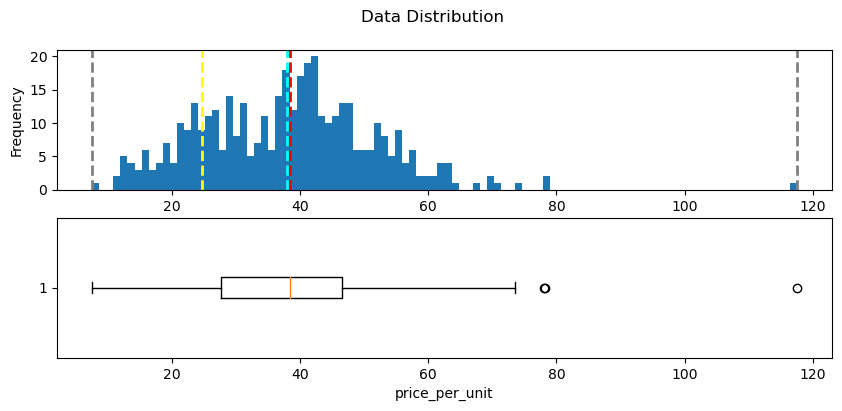

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

# Create a function that we can re-use
def show_distribution(var_data):
    '''
    This function will make a distribution (graph) and display it
    '''

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print(f'Minimum:{min_val:.2f}\n' +
          f'Mean:{mean_val:.2f}\n' +
          f'Median:{med_val:.2f}\n' +
          f'Mode:{mod_val:.2f}\n' +
          f'Maximum:{max_val:.2f}\n')
    
    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram   
    ax[0].hist(var_data, bins = 100)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel(var_data.name)

    # Add a title to the Figure
    fig.suptitle('Data Distribution')

    # Show the figure
    plt.show()
    
label = 'price_per_unit'    
show_distribution(data[label])

Distribution of all features

Minimum:2012.67
Mean:2013.15
Median:2013.17
Mode:2013.42
Maximum:2013.58



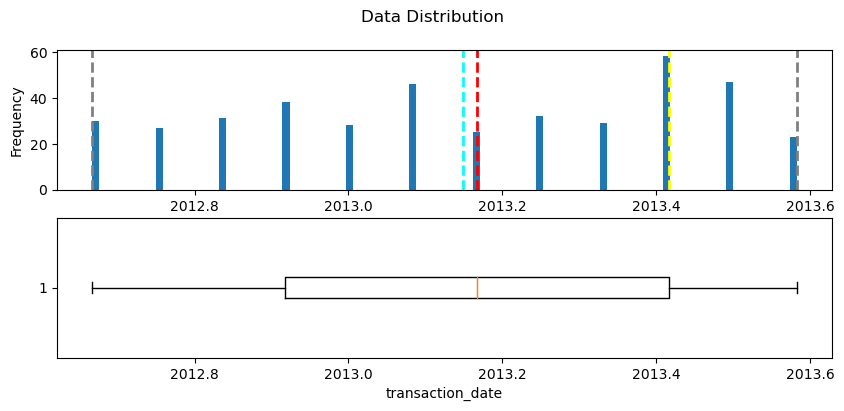

Minimum:0.00
Mean:17.71
Median:16.10
Mode:0.00
Maximum:43.80



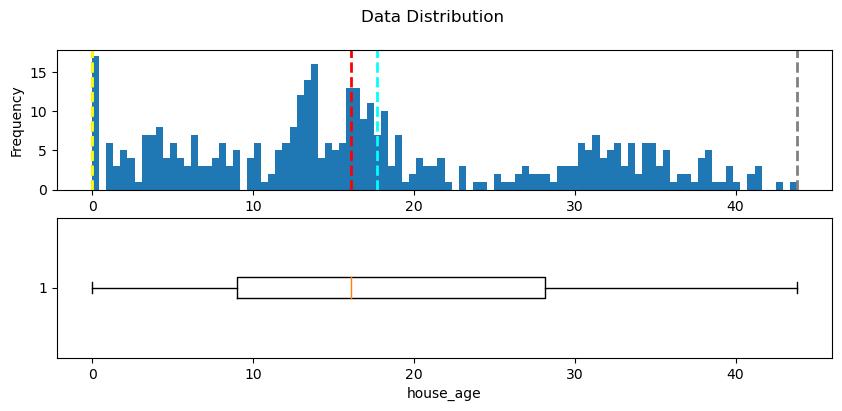

Minimum:23.38
Mean:1083.89
Median:492.23
Mode:289.32
Maximum:6488.02



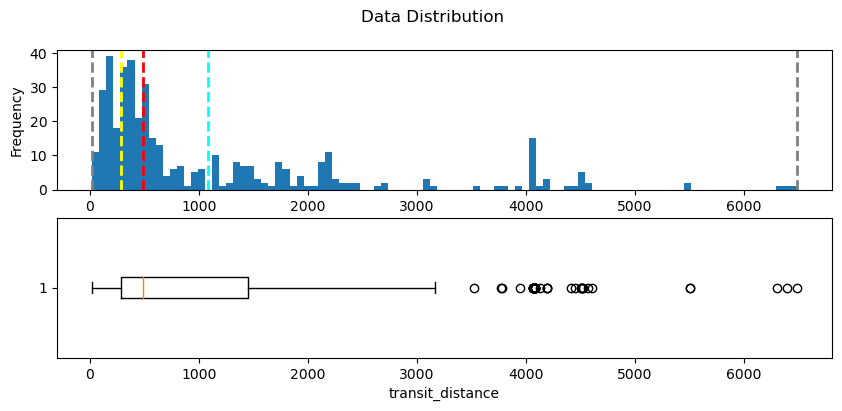

Minimum:0.00
Mean:4.09
Median:4.00
Mode:0.00
Maximum:10.00



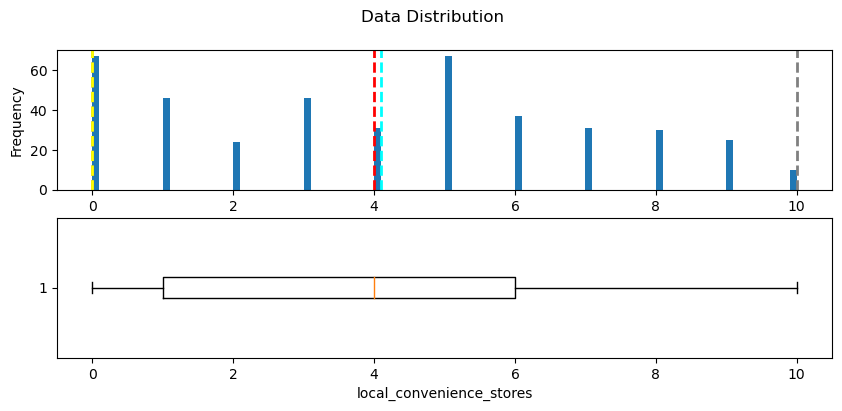

Minimum:24.93
Mean:24.97
Median:24.97
Mode:24.97
Maximum:25.01



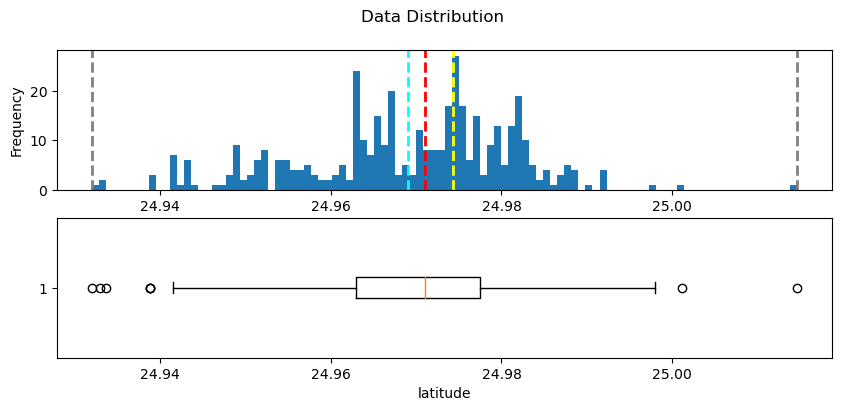

Minimum:121.47
Mean:121.53
Median:121.54
Mode:121.54
Maximum:121.57



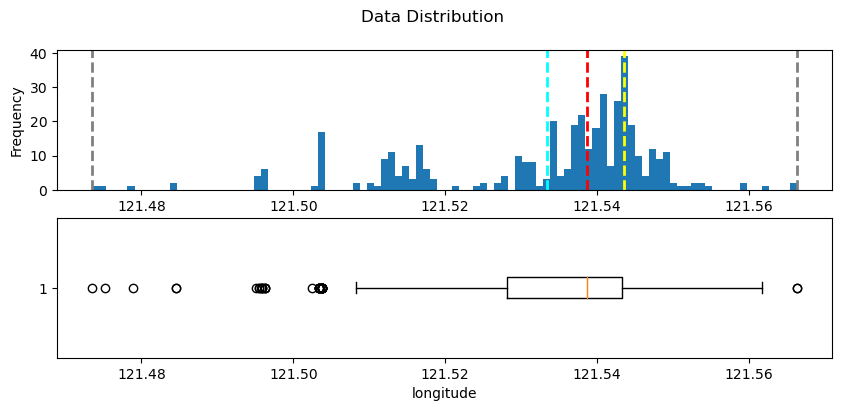

In [5]:
features = list(data)
features.remove("price_per_unit")

for column in features:
    show_distribution(data[column])

It seems that the most promising candidate is **transit_distance**.

## Let's train some models

### 1. Simple linear regression

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

import numpy as np

x_train, x_test, y_train, y_test = train_test_split(data[features],data[label],test_size=0.2, random_state=2)

# transform numeric data
numeric_transformer = Pipeline(steps = [('scaler', StandardScaler())])

preprocessing = ColumnTransformer(transformers=[('num',numeric_transformer,features)])

def evaluate_model(method):
    #combine everything into pipeline
    pipeline = Pipeline(steps = [('preprocessor', preprocessing),
                             ('regressor', method())])

    model = pipeline.fit(x_train, y_train)

    predictions = model.predict(x_test)
    mse = mean_squared_error(y_test, predictions)
    print(f"RMSE is {np.sqrt(mse):2f}")

    return model

evaluate_model(LinearRegression)

RMSE is 10.363590


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['transaction_date',
                                                   'house_age',
                                                   'transit_distance',
                                                   'local_convenience_stores',
                                                   'latitude',
                                                   'longitude'])])),
                ('regressor', LinearRegression())])

### 2. Decision tree

In [7]:
from sklearn.tree import DecisionTreeRegressor

evaluate_model(DecisionTreeRegressor)


RMSE is 9.823067


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['transaction_date',
                                                   'house_age',
                                                   'transit_distance',
                                                   'local_convenience_stores',
                                                   'latitude',
                                                   'longitude'])])),
                ('regressor', DecisionTreeRegressor())])

### 3. Lasso

In [8]:
from sklearn.linear_model import Lasso

evaluate_model(Lasso)


RMSE is 10.557459


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['transaction_date',
                                                   'house_age',
                                                   'transit_distance',
                                                   'local_convenience_stores',
                                                   'latitude',
                                                   'longitude'])])),
                ('regressor', Lasso())])

### 4. Random forest

In [9]:
from sklearn.ensemble import RandomForestRegressor

evaluate_model(RandomForestRegressor)

RMSE is 9.502073


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['transaction_date',
                                                   'house_age',
                                                   'transit_distance',
                                                   'local_convenience_stores',
                                                   'latitude',
                                                   'longitude'])])),
                ('regressor', RandomForestRegressor())])

### 5. Gradient Boost

In [10]:
from sklearn.ensemble import GradientBoostingRegressor

evaluate_model(GradientBoostingRegressor)

RMSE is 9.715293


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['transaction_date',
                                                   'house_age',
                                                   'transit_distance',
                                                   'local_convenience_stores',
                                                   'latitude',
                                                   'longitude'])])),
                ('regressor', GradientBoostingRegressor())])

It seems that tree type models are better. However, it haven't met the target RMSE.

## Clean the data

Minimum:7.60
Mean:37.34
Median:38.25
Mode:24.70
Maximum:69.70



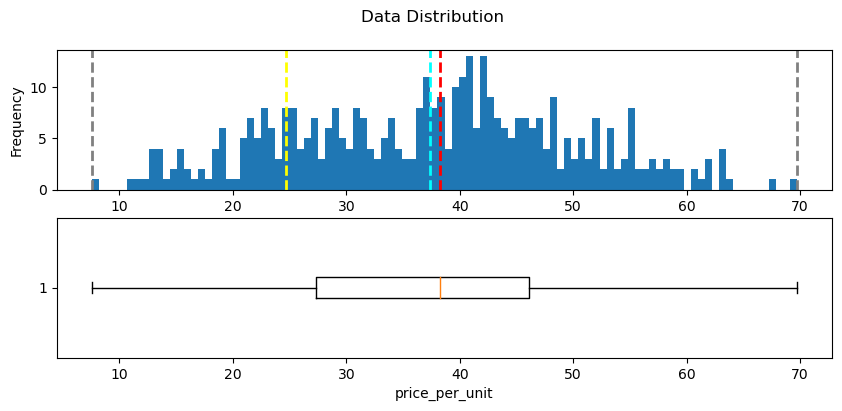

In [11]:
data = data[data[label]<70]

show_distribution(data[label])

Correlation with transaction_date is 0.06722009401858668


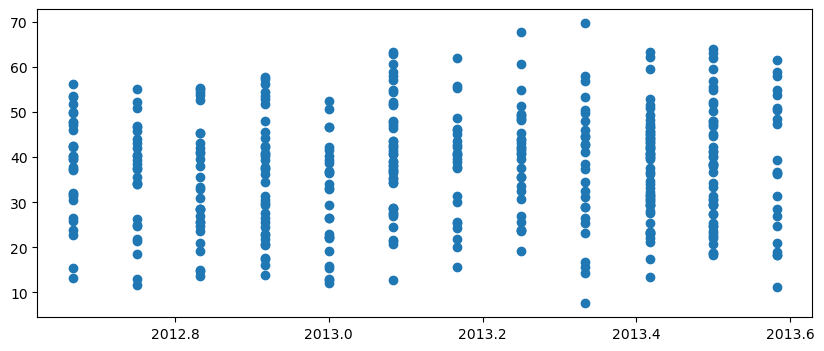

Correlation with house_age is -0.22013079536804572


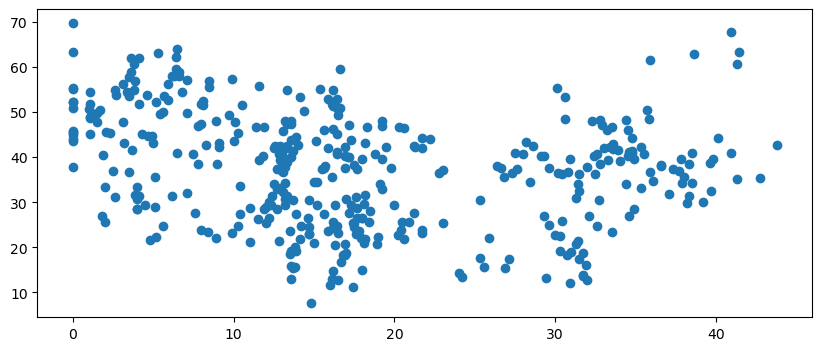

Correlation with transit_distance is -0.7087782301221979


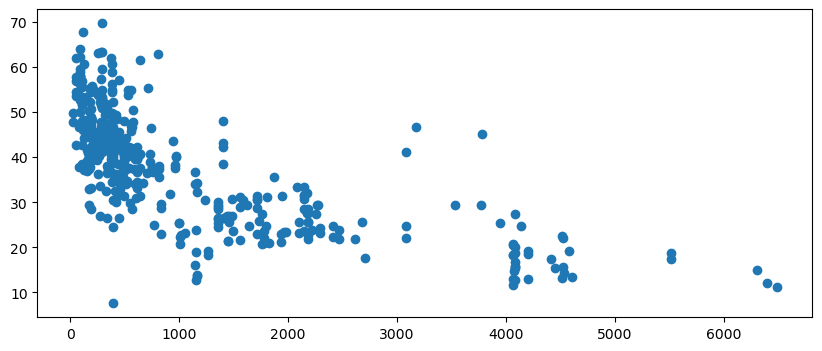

Correlation with local_convenience_stores is 0.6101016654608709


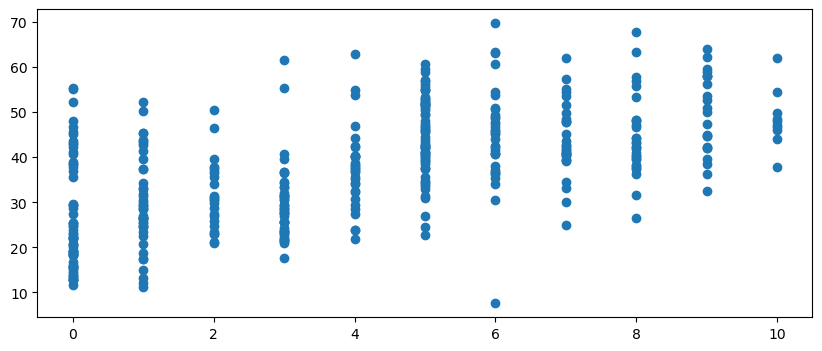

Correlation with latitude is 0.5747142429213647


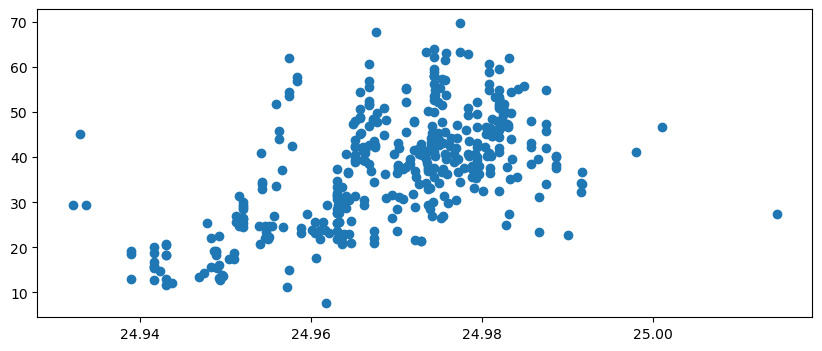

Correlation with longitude is 0.5560454415585724


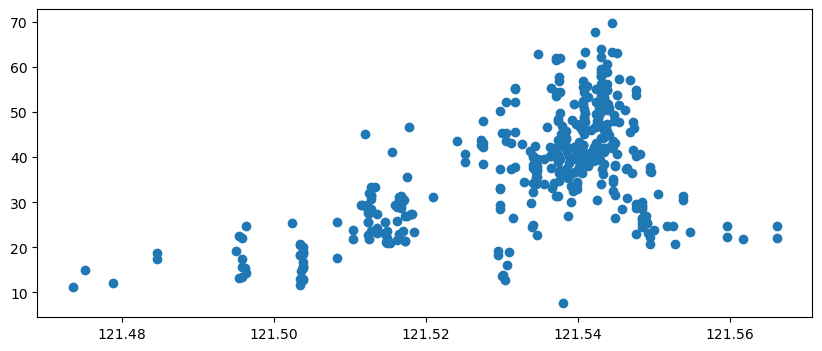

In [12]:
def show_correlation(label,feature):
    fig = plt.figure(figsize=(10,4))
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    print(f"Correlation with {feature.name} is {correlation}")
    plt.show()

for feature in features:
    show_correlation(data[label],data[feature])

It seems that transaction date is not that important

In [40]:
try:
    features.remove('transaction_date')
except:
    print('Already removed')

x_train, x_test, y_train, y_test = train_test_split(data[features],data[label],train_size=0.3,random_state=2)

Already removed


## Train the model

We know that Random forest is the best for this job so let's use it.

In [41]:
model = evaluate_model(RandomForestRegressor)

RMSE is 6.757601


Save the model

In [50]:
import pickle

pickle.dump(model, open('./data/model_real_estate.pickle', 'wb'))

Load the model

In [51]:
loaded_model = pickle.load(open('./data/model_real_estate.pickle', 'rb'))

## Use the Trained Model

Save your trained model, and then use it to predict the price-per-unit for the following real estate transactions:

| transaction_date | house_age | transit_distance | local_convenience_stores | latitude | longitude |
| ---------------- | --------- | ---------------- | ------------------------ | -------- | --------- |
|2013.167|16.2|289.3248|5|24.98203|121.54348|
|2013.000|13.6|4082.015|0|24.94155|121.50381|

In [59]:
# Your code to use the trained model

X_new = np.array([[16.2,289.3248,5,24.98203,121.54348],
                  [13.6,4082.015,0,24.94155,121.5038]])
x_df = pd.DataFrame(data=X_new, columns=features)
# Use the model to predict unit price
results = loaded_model.predict(x_df)
print('Predictions:')
for prediction in results:
    print(round(prediction,2))

Predictions:
48.81
16.45
